<a href="https://colab.research.google.com/github/JennyferSRodriguezH/Metodos--Numericos/blob/main/Newton_SecanteHornerMuller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo de Newton-Raphson

---






In [18]:
# Método de Newton-Raphson


import numpy as np

# Funcion y su derivada
fx  = lambda x: x**3 + 4*(x**2) - 10
dfx = lambda x: 3*(x**2) + 8*x

a=1
b=2
x0 = (a+b)/2
tolera = 0.001 

# PROCEDIMIENTO
tabla = [] #para convertirlo en lista 
tramo = abs(2*tolera)
xi = x0 #El valor medio se convirtio en un valor para la sucesion. En este caso seria Pn-1
while (tramo>=tolera):
    Pn = xi - fx(xi)/dfx(xi)
    tramo  = abs(Pn-xi)
    tabla.append([xi, Pn])
    xi = Pn

# convierte la lista a un arreglo.
tabla = np.array(tabla)
n = len(tabla)

# SALIDA
print('xi', '\tPn')
np.set_printoptions(precision = 4)
print(tabla)
print('\nRaiz en: ', xi)
print('\nError de: ',tramo)

xi 	Pn
[[1.5    1.3733]
 [1.3733 1.3653]
 [1.3653 1.3652]]

Raiz en:  1.3652300139161466

Error de:  3.200095847999407e-05


# Metodo de la Secante



[xa ,	 xb , 	 Pn]
[1.5    1.504  1.3736]
[1.3736 1.5    1.3658]
[1.3658 1.3736 1.3652]

Raiz en:  1.3652321429167764


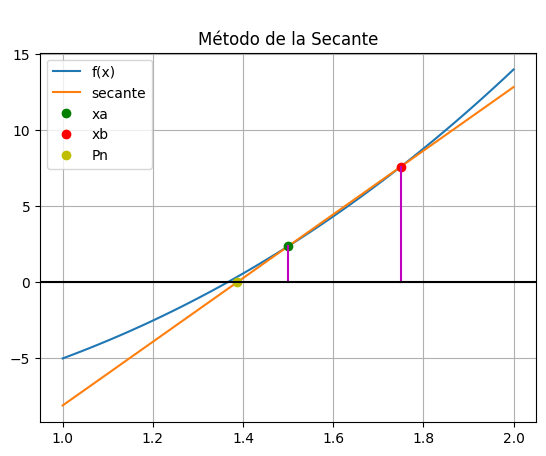

In [25]:
#Metodo de la secante
import numpy as np

def secante_tabla(fx,xa):
    dx = 4*tolera
    xb = xa + dx
    tramo = dx
    tabla = []
    while (tramo>=tolera):
        fa = fx(xa)#Funcion evaluada en el punto a
        fb = fx(xb)#Funcion evaluada en el punto b
        Pn = xa - fa*(xb-xa)/(fb-fa)
        tramo = abs(Pn-xa)
        
        tabla.append([xa,xb,Pn])
        xb = xa
        xa = Pn

    tabla = np.array(tabla)
    return(tabla)

# Funcion
fx = lambda x: x**3 + 4*x**2 - 10

a  = 1
b  = 2
xa = 1.5 #punto medio
tolera = 0.001
tramos = 100


tabla = secante_tabla(fx,xa)
n = len(tabla)
raiz = tabla[n-1,2]

#Se muestra en la pantalla

np.set_printoptions(precision=4)
print('[xa ,\t xb , \t Pn]')
for i in range(0,n,1):
    print(tabla[i])
print('\nRaiz en: ', raiz)


# Para la Grafica
import matplotlib.pyplot as plt

# Calcula los puntos a graficar
xi = np.linspace(a,b,tramos+1)
fi = fx(xi)
dx = (b-xa)/2
pendiente = (fx(xa+dx)-fx(xa))/(xa+dx-xa)
b0 = fx(xa) - pendiente*xa
tangentei = pendiente*xi+b0

fxa = fx(xa)
xb = xa + dx
fxb = fx(xb)

plt.plot(xi,fi, label='f(x)')

plt.plot(xi,tangentei, label='secante')
plt.plot(xa,fx(xa),'go', label='xa')
plt.plot(xa+dx,fx(xa+dx),'ro', label='xb')
plt.plot((-b0/pendiente),0,'yo', label='Pn')

plt.plot([xa,xa],[0,fxa],'m')
plt.plot([xb,xb],[0,fxb],'m')

plt.axhline(0, color='k')
plt.title('\nMétodo de la Secante')
plt.legend()
plt.grid()
plt.show()

## Metodo de Horner

In [26]:
a0  =  int ( input( " \n Ingresa el termino a la 0 >> " ))
a1  =  int ( input( " \n Ingresa el termino a la 1 >> " ))
a2  =  int ( input( " \n Ingresa el termino a la 2 >> " ))
a3  =  int ( input( " \n Ingresa el termino a la 3 >> " ))
a4  =  int ( input( " \n Ingresa el termino a la 4 >> " ))

a = [ a4 , a3 , a2 , a1 , a0 ]
def  horner ( a , x ): #implementa metodo de horner
        if  len ( a ) == 1 : #Ponemos los coeficientes del polinomio
            return  a [ 0 ] #Y en X el valor a evaluar
        else:
            return a [ 0 ] +  x  *  horner ( a [ 1 :], x )
x  =  1

print('\nEl resultado de la division sintetica es:', horner ( a , x ))

 
 Ingresa el termino a la 0 >> 3
 
 Ingresa el termino a la 1 >> 5
 
 Ingresa el termino a la 2 >> 7
 
 Ingresa el termino a la 3 >> 2
 
 Ingresa el termino a la 4 >> 0
E|resultado de la division sintetica es: 17


# Metodo de Muller

In [28]:
import math

def muller(f, x0, x1, x2, epsilon=1e-10, max_iter=100):
    h1 = x1 - x0
    h2 = x2 - x1
    y1 = (f(x1) - f(x0)) / h1
    y2 = (f(x2) - f(x1)) / h2
    d = (y2 - y1) / (h2 + h1)
    n_iter = 3
    x = None

    while n_iter <= max_iter:
        b = y2 + h2*d
        D = math.sqrt(b**2 - 4*f(x2)*d)

        if abs(b-D) < abs(b+D):
            E = b + D
        else:
            E = b - D

        h = -2*f(x2)/E
        p = x2 + h

        if abs(h) < epsilon:
            x = p
            break

        x0, x1, x2 = x1, x2, p
        h1 = x1 - x0
        h2 = x2 - x1
        y1 = (f(x1) - f(x0)) / h1
        y2 = (f(x2) - f(x1)) / h2
        d = (y2 - y1) / (h2 + h1)
        n_iter += 1

    if x is None:
        raise ValueError("El método no converge")

    return x



fun = lambda x: x**2 + 2*x - 8

muller(fun, 0, 4, 8)# 2.0
muller(fun, -10, -6, -1) # -4.0

-4.0

In [40]:
import numpy as np
import matplotlib . pyplot as plt
import math
import cmath

def muller (f , x0 , x1 , x2 , imax =100 , tol =1e-8):
    cumple = False
    print ('{:^10 s} {:^10 s} {:^10 s} {:^10 s} {:^10 s} {:^10 s} {:^10 s}←-{:^10 s}'.format ('x0 ','x1 ','x2 ','x3 ','f(x0)','f(x1)','f(x2)','f(x3←-)') )
    k =0
    while (not cumple and k < imax ) :
        d1 =( f ( x1 ) -f ( x0 ) ) /( x1 - x0 )
        d2 =( f ( x2 ) -f ( x1 ) ) /( x2 - x1 )
        d3 =( d2 - d1 ) /( x2 - x0 )
        a = d3
        b = d1 - a *( x0 + x1 )
        c = f ( x0 ) + x0 *( a * x1 - d1 )
        den1 = - b + np . sqrt ( b **2 -4* a * c )
        den2 = -b - np . sqrt ( b **2 -4* a * c )
        if abs( den1 ) >abs( den2 ) :
            x3 =2* c / den1
        else:
            x3 =2* c / den2

        print ('{:10.5 f} {:10.5 f} {:10.5 f} {:10.5 f} {:10.5 f} {:10.5←-f} {:10.5 f} {:10.5 f}'.format ( x0 , x1 , x2 , x3 , f ( x0 ) ,f ( x1 ) ,f ( x2 ) ,f ( x3 ) ) )
        x0 = x1
        x1 = x2
        x2 = x3
        cumple =abs( f ( x3 ) ) < tol
        k +=1
    if k < imax:
          return x3
    else:
          raise ValueError ('La funcion no converge ')

# Funcion a evaluar
def f ( x ) :
  return x**2 + 2*x - 8
  #return np . cos ( x ) -x **2


def main () :
  #valores iniciales
  x0 =1
  x1 =2
  x2 =3
# Llamada al algoritmo
  raiz = muller (f , x0 , x1 , x2 ,100 ,1e-4)
  print ('f ({: e }) ={: e }'. format ( raiz ,f ( raiz ) ) )

  x = np . linspace ( -3 ,3 ,100)
  y = f ( x)

  fig = plt . figure ()
  plt . plot (x , y )
  plt . title ('$f ( x ) = cos ( x ) - x ^2 $')
  plt . scatter ( raiz ,f ( raiz ) )
  plt . text ( raiz , f ( raiz ) ,' Raiz '+str( raiz ) , color ='red ')
  plt . grid ()
  plt . show ()

  if __name__ == " __main__ ": main ()